# ResNet (2015)

[Deep Residual Learning for Image Recognition](https://arxiv.org/pdf/1512.03385.pdf)

- Author: Kaiming He et al. (Microsoft Research)

이번 튜토리얼에서는 **ResNet-18** 모델을 구현합니다.

## imports

In [1]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.layers import concatenate, Input, Conv2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.layers import AveragePooling2D, BatchNormalization, Dense 
from tensorflow.keras.models import Model

## Prepare Datasets

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [3]:
train_path = os.path.join(PATH, 'train')
validation_path = os.path.join(PATH, 'validation')

### Hyperparameter

In [4]:
IMAGE_W = 224
IMAGE_H = 224
IMAGE_C = 3
BATCH_SIZE = 32
NUM_CLASSES = 2

## Image Generator

In [5]:
training_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

In [6]:
validation_datagen = ImageDataGenerator(
    rescale=1./255
)

In [7]:
training_generator = training_datagen.flow_from_directory(train_path, 
                                                          batch_size=BATCH_SIZE, 
                                                          shuffle=True,
                                                          target_size=(IMAGE_W, IMAGE_H), 
                                                          class_mode='categorical'
                                                         )

Found 2000 images belonging to 2 classes.


In [8]:
validation_generator = validation_datagen.flow_from_directory(validation_path, 
                                                              batch_size=BATCH_SIZE, 
                                                              shuffle=True,
                                                              target_size=(IMAGE_W, IMAGE_H), 
                                                              class_mode='categorical'
                                                             )

Found 1000 images belonging to 2 classes.


Augmentation 적용한 사진 파일
(32, 224, 224, 3) (32, 2)
[0. 1.]


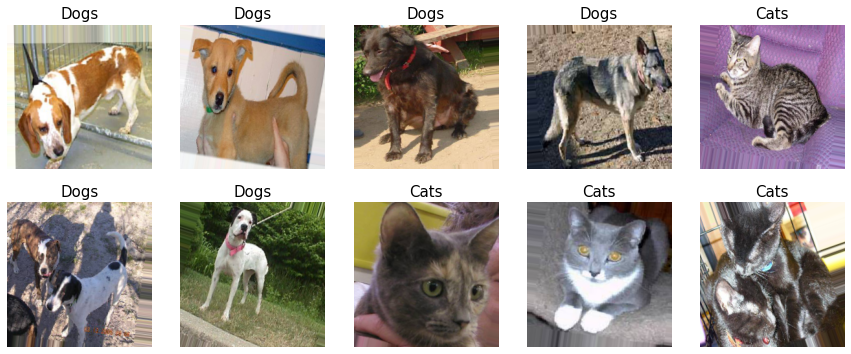

In [9]:
class_map = {
    0: 'Cats',
    1: 'Dogs', 
}

print('Augmentation 적용한 사진 파일')
    
for x, y in training_generator:
    print(x.shape, y.shape)
    print(y[0])
    
    fig, axes = plt.subplots(2, 5)
    fig.set_size_inches(15, 6)
    for i in range(10):
        axes[i//5, i%5].imshow(x[i])
        axes[i//5, i%5].set_title(class_map[y[i].argmax()], fontsize=15)
        axes[i//5, i%5].axis('off')
    
    plt.show()
    break

## Model

In [10]:
Image(url='https://pytorch.org/assets/images/resnet.png')

## Residual Block

In [11]:
Image(url='https://d2l.ai/_images/resnet-block.svg')

### Functional API

In [12]:
def residual_identity_block(x, filters, strides=1, downsample=False):

    initial_x = x
    
    # first conv2d (3, 3)
    x = Conv2D(  )(x) 
    # batch normalization
    x = 
    x = tf.nn.relu(x)
    
    # second conv2d (3, 3)
    x = Conv2D(   )(x)
    # batch normalization
    x = 
    
    if downsample:
        # downsample (1, 1)
        initial_x = Conv2D(   )(initial_x)
        # batch normalization
        initial_x = 
    
    # skip connection
    x 
    x = tf.nn.relu(x)    
    return x

In [13]:
# 검증코드
residual_identity_block(tf.zeros([1, 32, 32, 64]), 64, strides=1, downsample=False).shape
# 결과 값
# TensorShape([1, 32, 32, 64])

TensorShape([1, 32, 32, 64])

In [14]:
# 검증코드
residual_identity_block(tf.zeros([1, 32, 32, 3]), 64, strides=2, downsample=True).shape
# 결과 값
# TensorShape([1, 16, 16, 64])

TensorShape([1, 16, 16, 64])

### Subclassing API

In [15]:
Image(url='https://pytorch.org/assets/images/resnet.png')

In [16]:
inputs = Input(shape=(224, 224, 3))

x = Conv2D(64, kernel_size=(7, 7), strides=2, padding='same')(inputs)

# conv2
x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)
x = residual_identity_block( )
x = residual_identity_block( )

# conv3
x = residual_identity_block( )
x = residual_identity_block( )

# conv4
x = residual_identity_block( )
x = residual_identity_block( )

# conv5
x = residual_identity_block( )
x = residual_identity_block( )

# GlobalAveragePooling
x = GlobalAveragePooling2D()(x) 

x = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=inputs, outputs=x)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 112, 112, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 56, 56, 64)   0           conv2d_5[0][0]                   
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 56, 56, 64)   36928       max_pooling2d[0][0]              
______________________________________________________________________________________________

## ResNet-50

In [17]:
def residual_bottleneck(x, filters, strides=1, downsample=False):

    initial_x = x
    filter1, filter2 = filters
    
    # first conv2d (1, 1)
    x = Conv2D( )(x) 
    # batch normalization
    x = 
    x = tf.nn.relu(x)
    
    # second conv2d (3, 3)
    x = Conv2D( )(x)
    # batch normalization
    x = 
    x = tf.nn.relu(x)
    
    # third conv2d (1, 1)
    x = Conv2D( )(x) 
    # batch normalization
    x = 
    
    if downsample:
        # downsample (1, 1)
        initial_x = Conv2D( )(initial_x)
        initial_x = 
    else:
        initial_x = Conv2D( )(initial_x)
        initial_x = 
    
    # skip connection
    x 
    x = tf.nn.relu(x)    
    return x

In [18]:
# 검증코드
residual_bottleneck(tf.zeros([1, 112, 112, 64]), [64, 256], strides=2, downsample=True).shape
# 결과 값
# TensorShape([1, 56, 56, 256])

TensorShape([1, 56, 56, 256])

In [19]:
# 검증코드
residual_bottleneck(tf.zeros([1, 28, 28, 512]), [256, 1024], strides=2, downsample=True).shape
# 결과 값
# TensorShape([1, 14, 14, 1024])

TensorShape([1, 14, 14, 1024])

## Model (ResNet-50)

In [20]:
inputs = Input(shape=(224, 224, 3))

x = Conv2D(64, kernel_size=(7, 7), strides=2, padding='same')(inputs)

# conv2
x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)
x = residual_bottleneck( )
x = residual_bottleneck( )
x = residual_bottleneck( )

# conv3
x = residual_bottleneck( )
x = residual_bottleneck( )
x = residual_bottleneck( )
x = residual_bottleneck( )

# conv4
x = residual_bottleneck( )
x = residual_bottleneck( )
x = residual_bottleneck( )
x = residual_bottleneck( )
x = residual_bottleneck( )
x = residual_bottleneck( )

# conv5
x = residual_bottleneck( )
x = residual_bottleneck( )
x = residual_bottleneck( )

# GlobalAveragePooling
x = GlobalAveragePooling2D()(x) 

x = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=inputs, outputs=x)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_33 (Conv2D)              (None, 112, 112, 64) 9472        input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 56, 56, 64)   0           conv2d_33[0][0]                  
__________________________________________________________________________________________________
conv2d_34 (Conv2D)              (None, 56, 56, 64)   4160        max_pooling2d_1[0][0]            
____________________________________________________________________________________________

## Subclassing

In [21]:
class ResidualBlock(tf.keras.Model):
    def __init__(self, filters, downsample=False):
        super(ResidualBlock, self).__init__(name='')

        if downsample:
            strides = [2, 1, 2]
        else:
            strides = [1, 1, 1]
        
        # first conv2d
        self.conv1 = tf.keras.layers.Conv2D( )
        # second conv2d
        self.conv2 = tf.keras.layers.Conv2D( )
        
        if strides[0] != 1: 
            # third conv2d
            self.conv3 = tf.keras.layers.Conv2D( )
            self.batchnorm3 = tf.keras.layers.BatchNormalization()
        else:
            self.conv3 = None
        
        self.batchnorm1 = tf.keras.layers.BatchNormalization()
        self.batchnorm2 = tf.keras.layers.BatchNormalization()
        

    def call(self, input_tensor, downsample=False, training=False):
        
        initial_x = input_tensor
        
        # first conv2d
        x = 
        # batch normalization
        x = 
        x =  tf.nn.relu(x)

        # second conv2d
        x = 
        # batch normalization
        x = 
        
        # third conv2d
        if self.conv3 is not None:
            initial_x = 
            # batch normalization
            initial_x = 

        # skip conneciton
        x += initial_x
        
        return  tf.nn.relu(x)

block = ResidualBlock(64, False)
print(block(tf.zeros([1, 56, 56, 64])).shape)
# (1, 56, 56, 64)

(1, 56, 56, 64)


## compile() & fit()

In [22]:
model.compile(optimizer=tf.keras.optimizers.SGD(momentum=0.9), loss='categorical_crossentropy', metrics=['acc'])

In [23]:
EPOCHS = 10
history = model.fit(training_generator, 
                    validation_data=(validation_generator), 
                    epochs=EPOCHS
                   )

Epoch 1/10
63/63 [==============================] - 23s 305ms/step - loss: 1.4995 - acc: 0.5246 - val_loss: 8611.1191 - val_acc: 0.5000
Epoch 2/10
63/63 [==============================] - 18s 279ms/step - loss: 0.8412 - acc: 0.5078 - val_loss: 9.2301 - val_acc: 0.5000
Epoch 3/10
63/63 [==============================] - 18s 279ms/step - loss: 0.6899 - acc: 0.5734 - val_loss: 1.0145 - val_acc: 0.4850
Epoch 4/10
63/63 [==============================] - 18s 280ms/step - loss: 0.6618 - acc: 0.6156 - val_loss: 0.6537 - val_acc: 0.6170
Epoch 5/10
63/63 [==============================] - 18s 283ms/step - loss: 0.6573 - acc: 0.6232 - val_loss: 0.6476 - val_acc: 0.6250
Epoch 6/10
63/63 [==============================] - 18s 279ms/step - loss: 0.6470 - acc: 0.6434 - val_loss: 0.6708 - val_acc: 0.6210
Epoch 7/10
63/63 [==============================] - 18s 279ms/step - loss: 0.6616 - acc: 0.6248 - val_loss: 0.6331 - val_acc: 0.6430
Epoch 8/10
63/63 [==============================] - 18s 280ms/step

## 시각화

In [ ]:
fig, ax1 = plt.subplots()
fig.set_size_inches((10, 6))

color = 'tab:red'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('loss', color=color)
ax1.plot(range(EPOCHS), history.history['loss'], label='loss', linestyle=':', color='tomato')
ax1.plot(range(EPOCHS), history.history['val_loss'], label='val_loss', color='tomato')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)
ax2.plot(range(EPOCHS), history.history['acc'], label='acc', linestyle=':', color='navy')
ax2.plot(range(EPOCHS), history.history['val_acc'], label='val_acc', color='navy')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')
plt.tight_layout()
plt.title('Errors')
plt.show()

## Transfer Learning 

transfer learning 시 **image normalization을 적용하지 않습니다**.

In [24]:
training_datagen = ImageDataGenerator()
training_generator = training_datagen.flow_from_directory(train_path, 
                                                          batch_size=64, 
                                                          shuffle=True,
                                                          target_size=(224, 224), 
                                                          class_mode='categorical'
                                                         )

validation_generator = training_datagen.flow_from_directory(validation_path, 
                                                          batch_size=64, 
                                                          shuffle=True,
                                                          target_size=(224, 224), 
                                                          class_mode='categorical'
                                                         )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [25]:
resnet50 = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet50.trainable = False

[관련 도큐먼트](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet/preprocess_input?hl=ko)

In [26]:
model = tf.keras.Sequential([
    resnet50, 
    GlobalAveragePooling2D(), 
    Dense(NUM_CLASSES, activation='softmax')
])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [29]:
EPOCHS = 10
history = model.fit(training_generator, 
                    validation_data=(validation_generator), 
                    epochs=EPOCHS, 
                    batch_size=128
                   )

Epoch 1/10
32/32 [==============================] - 9s 227ms/step - loss: 0.3508 - acc: 0.8385 - val_loss: 0.1170 - val_acc: 0.9560
Epoch 2/10
32/32 [==============================] - 6s 201ms/step - loss: 0.0972 - acc: 0.9643 - val_loss: 0.0899 - val_acc: 0.9650
Epoch 3/10
32/32 [==============================] - 7s 205ms/step - loss: 0.0543 - acc: 0.9827 - val_loss: 0.0763 - val_acc: 0.9780
Epoch 4/10
32/32 [==============================] - 6s 198ms/step - loss: 0.0538 - acc: 0.9829 - val_loss: 0.0683 - val_acc: 0.9760
Epoch 5/10
32/32 [==============================] - 6s 199ms/step - loss: 0.0350 - acc: 0.9914 - val_loss: 0.0678 - val_acc: 0.9770
Epoch 6/10
32/32 [==============================] - 6s 199ms/step - loss: 0.0331 - acc: 0.9910 - val_loss: 0.0683 - val_acc: 0.9770
Epoch 7/10
32/32 [==============================] - 6s 199ms/step - loss: 0.0268 - acc: 0.9961 - val_loss: 0.0687 - val_acc: 0.9740
Epoch 8/10
32/32 [==============================] - 7s 204ms/step - loss: 0.

## 시각화

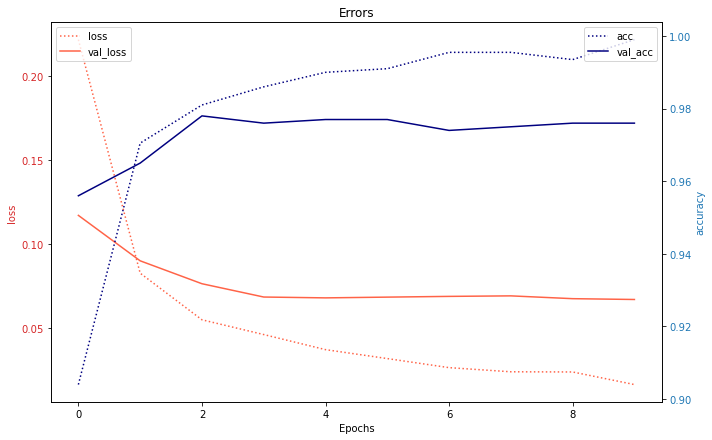

In [30]:
fig, ax1 = plt.subplots()
fig.set_size_inches((10, 6))

color = 'tab:red'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('loss', color=color)
ax1.plot(range(EPOCHS), history.history['loss'], label='loss', linestyle=':', color='tomato')
ax1.plot(range(EPOCHS), history.history['val_loss'], label='val_loss', color='tomato')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')
ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)
ax2.plot(range(EPOCHS), history.history['acc'], label='acc', linestyle=':', color='navy')
ax2.plot(range(EPOCHS), history.history['val_acc'], label='val_acc', color='navy')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')
plt.tight_layout()
plt.title('Errors')
plt.show()